# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [14]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Very good flight following an ...
1,Not Verified | An hour's delay due to late ar...
2,✅ Trip Verified | I booked through BA becaus...
3,✅ Trip Verified | British airways lost bags ...
4,✅ Trip Verified | The check in process and rew...


In [15]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [16]:
df.shape

(1000, 1)

In [17]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [18]:
df

,reviews
0,Very good flight following an equally good f...
1,An hour's delay due to late arrival of the i...
2,I booked through BA because Loganair don’t ...
3,British airways lost bags in LHR then found...
4,The check in process and reward/loyalty progr...
...,...
995,I have often flown British Airways and have ...
996,Good morning. I would like to write a review...
997,My flight was cancelled 3 days in a row. Was ...
998,Hong Kong to Copenhagen via London. The whol...


## Cleaning the text

In [19]:
import re

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Very good flight following an equally good f...,Very good flight following an equally good fl...
1,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...
2,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...
3,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...
4,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...


## Tokenization

In [26]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### POS tagging

In [27]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shardulgore/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa..."
1,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (..."
2,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe..."
3,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,..."
4,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal..."


## Lemmatization

In [28]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight Rome ...
1,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (...",hour delay due late arrival incoming aircraf...
2,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe...",book BA Loganair representative Manchester a...
3,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...
4,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal...",check process reward loyalty program mess ne...


In [29]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Very good flight following an equally good f...,good flight follow equally good flight Rome ...
1,An hour's delay due to late arrival of the i...,hour delay due late arrival incoming aircraf...
2,I booked through BA because Loganair don’t ...,book BA Loganair representative Manchester a...
3,British airways lost bags in LHR then found...,British airway lose bag LHR find Sent Cologn...
4,The check in process and reward/loyalty progr...,check process reward loyalty program mess ne...
...,...,...
995,I have often flown British Airways and have ...,often fly British Airways consider good airl...
996,Good morning. I would like to write a review...,Good morning would like write review British...
997,My flight was cancelled 3 days in a row. Was ...,flight cancel day row fly Thursday finally d...
998,Hong Kong to Copenhagen via London. The whol...,Hong Kong Copenhagen via London whole experi...


## Sentiment analysis using VADER

In [30]:
!pip install vaderSentiment -q

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight Rome ...,0.8271,Positive
1,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (...",hour delay due late arrival incoming aircraf...,0.8442,Positive
2,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe...",book BA Loganair representative Manchester a...,0.0552,Neutral
3,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...,-0.5994,Negative
4,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal...",check process reward loyalty program mess ne...,0.2500,Neutral


In [32]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    457
Negative    429
Neutral     114
Name: count, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x31875aa90>,
 [Text(0.1481458317165507, 1.0899783541635182, 'Positive'),
  Text(-0.5208208515331195, -0.9688888690702956, 'Negative'),
  Text(1.264342280562167, -0.4732215100593581, 'Neutral')],
 [Text(0.08080681729993675, 0.5945336477255553, '45.7%'),
  Text(-0.28408410083624697, -0.5284848376747067, '42.9%'),
  Text(0.7960673618354384, -0.29795428411144764, '11.4%')])

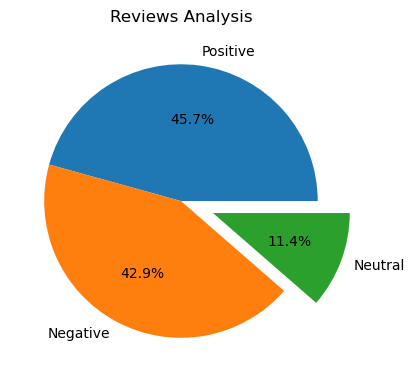

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [34]:
df.to_csv("BA_reviews.csv")

## Wordcloud

In [37]:
!pip install wordcloud -q

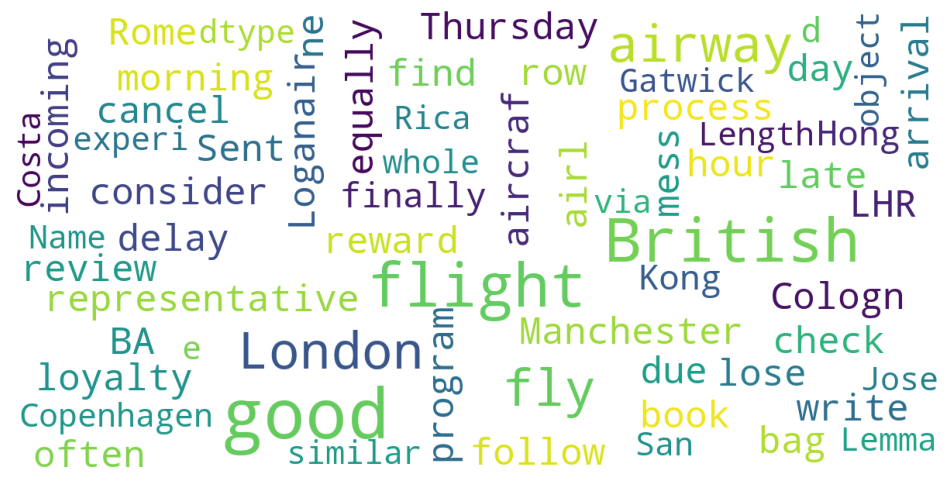

In [38]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)